<a href="https://colab.research.google.com/github/sheelapravalika/sheela2000.drdo/blob/main/SLM1(2)_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ✅ Install Required Packages
!pip install -q datasets sentence-transformers

# ✅ Imports
import pandas as pd
import numpy as np
from datasets import load_dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sentence_transformers import SentenceTransformer, util
import gc  # for cleanup


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.0 MB/s eta 0:00:00


In [ ]:

# ✅ STEP 2: Load CIC-IDS-2017 Dataset from Hugging Face (No CSV)
dataset = load_dataset("sonnh-tech1/cic-ids-2017", "binary")
df = dataset["train"].to_pandas()
print(df)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/92.8M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/107M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/108M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/107M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2522362 [00:00<?, ? examples/s]

         DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0                  54865             3                2                     0   
1                  55054           109                1                     1   
2                  55055            52                1                     1   
3                  46236            34                1                     1   
4                  54863             3                2                     0   
...                  ...           ...              ...                   ...   
2522357               53         32215                4                     2   
2522358               53           324                2                     2   
2522359            58030            82                2                     1   
2522360               53       1048635                6                     2   
2522361               53         94939                4                     2   

         TotalLengthofFwdPa

In [ ]:
# ✅ Sample to avoid crashing (adjust if needed)
df = df.sample(n=60000, random_state=42).reset_index(drop=True)

# ✅ Preprocess
df.dropna(inplace=True)
numeric_df = df.select_dtypes(include=[np.number])
if 'Label' not in numeric_df.columns and 'Label' in df.columns:
    numeric_df['Label'] = df['Label']

X = numeric_df.drop(columns=['Label'], errors='ignore')
y = LabelEncoder().fit_transform(numeric_df['Label'])

# ✅ Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# ✅ Convert to sentence-style text
text_data = pd.DataFrame(X_scaled).astype(str).agg(' '.join, axis=1).tolist()

# ✅ Load MiniLM model
model = SentenceTransformer('paraphrase-MiniLM-L3-v2')


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/3750 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)



✅ Accuracy: 0.86575

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      9991
           1       0.04      0.90      0.07        10
           2       0.85      0.99      0.92       590
           3       0.10      0.85      0.18        47
           4       0.84      0.91      0.88       821
           5       0.12      0.77      0.21        22
           6       0.11      0.87      0.20        30
           7       0.45      1.00      0.62        24
           8       0.70      0.99      0.82       439
           9       0.37      1.00      0.54        14
          10       0.03      0.67      0.06         9
          11       0.00      0.00      0.00         3

    accuracy                           0.87     12000
   macro avg       0.39      0.82      0.45     12000
weighted avg       0.96      0.87      0.90     12000



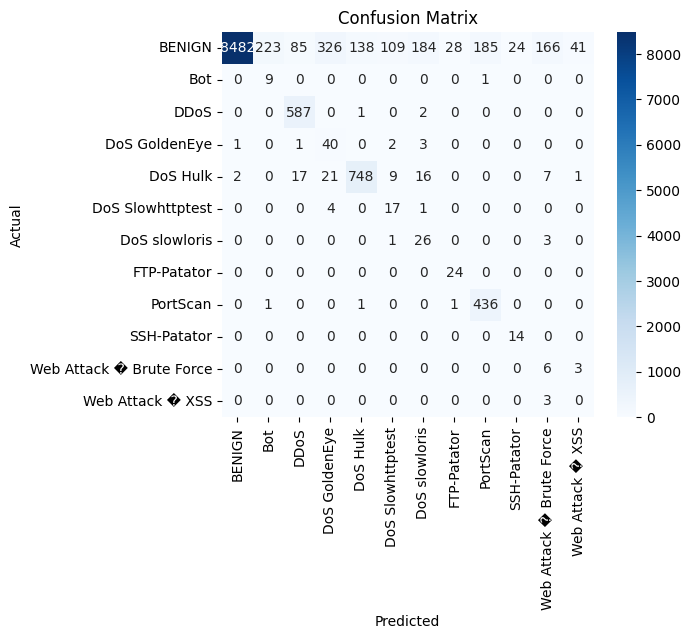

In [ ]:
# ✅ Encode using multiprocessing & batching (RAM-efficient)
X_embed = model.encode(
    text_data,
    batch_size=16,
    convert_to_numpy=True,
    show_progress_bar=True
)

# ✅ Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_embed, y, test_size=0.2, stratify=y, random_state=42
)
# ✅ Train classifier
clf = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    C=0.3
)
clf.fit(X_train, y_train)

# ✅ Evaluate
y_pred = clf.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))


from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix
)
from sentence_transformers import SentenceTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ STEP 13: Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
labels = list(LabelEncoder().fit(df['Label']).classes_)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [ ]:
import nbformat

# Step 1: Upload your broken notebook again
from google.colab import files
uploaded = files.upload()

# Replace this with the actual uploaded filename
filename = list(uploaded.keys())[0]

# Step 2: Load and clean
with open(filename, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# ✅ Step 3: Clean ONLY metadata.widgets (KEEP outputs and execution_count)
for cell in nb.cells:
    if 'metadata' in cell:
        cell['metadata'] = {k: v for k, v in cell['metadata'].items() if k != 'widgets'}

# ✅ Step 4: Clear notebook-level metadata.widgets (if present)
if 'widgets' in nb.get('metadata', {}):
    del nb['metadata']['widgets']

# Step 5: Save cleaned notebook
cleaned_filename = filename.replace('.ipynb', '_fixed.ipynb')
with open(cleaned_filename, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print(f"✅ Cleaned notebook saved (outputs preserved) as {cleaned_filename}")
files.download(cleaned_filename)